In [1]:
import numpy as np
from base import *
from Optimizers import NewtonOptimizer



In [2]:
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def rosenbrock_grad(x):
    return np.array([-400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0]),
                     200 * (x[1] - x[0]**2)])

In [3]:
problem = OptimizationProblem(rosenbrock, rosenbrock_grad)
optimizer = NewtonOptimizer(problem, line_search_type='fixed', tol=1e-6, max_iter=100)

In [7]:
# A simple test on classic Netwon Optimizer
x0 = np.array([-1.5, 2.0])
x_star = optimizer.solve(x0)
print(f"Initialization: {x0}")
print(f"Optimization: {x_star}")
print(f"F(x_best): {rosenbrock(x_star)}")
print(f"Iterations: {optimizer.iter_info['iter']}")

Iteration 10: Problem converged!
Initialization: [-1.5  2. ]
Optimization: [1. 1.]
F(x_best): 5.7192415628523356e-30
Iterations: 10


In [8]:
# Task 4: Newton with exact line search (Brent)
problem = OptimizationProblem(rosenbrock, rosenbrock_grad)
opt_exact = NewtonOptimizer(problem, line_search_type='exact', tol=1e-6, max_iter=500)

x0 = np.array([-1.2, 1.0], dtype=float)
x_star = opt_exact.solve(x0)

print(f"Initialization: {x0}")
print(f"Optimization: {x_star}")
print(f"F(x_best): {rosenbrock(x_star)}")
print(f"Iterations: {opt_exact.iter_info['iter']}")


Iteration 14: Problem converged!
Initialization: [-1.2  1. ]
Optimization: [1. 1.]
F(x_best): 1.0161131506430819e-23
Iterations: 14


In [ ]:
# Task 5: test to veiry convergence on Rosenbrock
!pytest -q tests/test_rosenbrock.py::test_newton_exact_line_search_rosenbrock

.                                                                        [100%]
1 passed in 10.29s


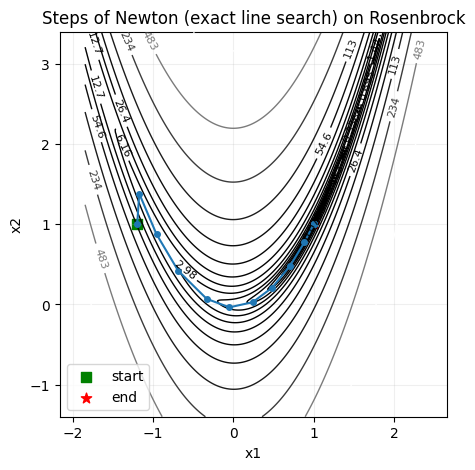

In [ ]:
# Task 5: Visualization: contour plot + iteration path (Fig.1 right style)
import numpy as np
import matplotlib.pyplot as plt

# sample area
xs = np.array(opt_exact.iter_info['x'])  # shape: (k, 2)

x_min = min(xs[:, 0].min(), -1.5)
x_max = max(xs[:, 0].max(), 2.0)
y_min = min(xs[:, 1].min(), -1.0)
y_max = max(xs[:, 1].max(), 3.0)

pad_x = 0.1 * (x_max - x_min)
pad_y = 0.1 * (y_max - y_min)

xlin = np.linspace(x_min - pad_x, x_max + pad_x, 300)
ylin = np.linspace(y_min - pad_y, y_max + pad_y, 300)
X, Y = np.meshgrid(xlin, ylin)
Z = 100.0 * (Y - X**2)**2 + (1.0 - X)**2

plt.figure(figsize=(5, 5))
# logarithmic contour lines
levels = np.logspace(-3, 3, 20)
CS = plt.contour(X, Y, Z, levels=levels, cmap='gray', linewidths=1)
plt.clabel(CS, inline=1, fontsize=8, fmt='%.3g')

# iterative trajectory
plt.plot(xs[:, 0], xs[:, 1], '-o', color='tab:blue', markersize=4, linewidth=1.5)
# start and end point
plt.scatter(xs[0, 0], xs[0, 1], c='green', s=60, marker='s', label='start')
plt.scatter(xs[-1, 0], xs[-1, 1], c='red', s=60, marker='*', label='end')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Steps of Newton (exact line search) on Rosenbrock')
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.2)
plt.show()


In [4]:
#task 6: inexact line search
problem = OptimizationProblem(rosenbrock, rosenbrock_grad)
opt_exact = NewtonOptimizer(problem, line_search_type='inexact', tol=1e-6, max_iter=500)

x0 = np.array([-1.2, 1.0], dtype=float)
x_star = opt_exact.solve(x0)

print(f"Initialization: {x0}")
print(f"Optimization: {x_star}")
print(f"F(x_best): {rosenbrock(x_star)}")
print(f"Iterations: {opt_exact.iter_info['iter']}")


Iteration 16: Problem converged!
Initialization: [-1.2  1. ]
Optimization: [1. 1.]
F(x_best): 6.55291416982679e-22
Iterations: 16


In [5]:
# Task 7: test to veiry convergence on Rosenbrock
!pytest -q tests/test_rosenbrock.py::test_newton_inexact_line_search_rosenbrock

.                                                                        [100%]
1 passed in 0.32s


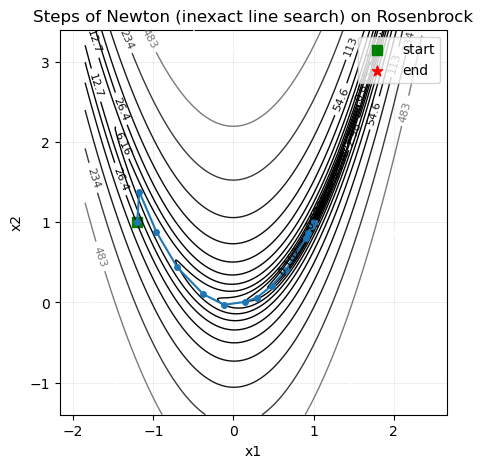

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# sample area
xs = np.array(opt_exact.iter_info['x'])  # shape: (k, 2)

x_min = min(xs[:, 0].min(), -1.5)
x_max = max(xs[:, 0].max(), 2.0)
y_min = min(xs[:, 1].min(), -1.0)
y_max = max(xs[:, 1].max(), 3.0)

pad_x = 0.1 * (x_max - x_min)
pad_y = 0.1 * (y_max - y_min)

xlin = np.linspace(x_min - pad_x, x_max + pad_x, 300)
ylin = np.linspace(y_min - pad_y, y_max + pad_y, 300)
X, Y = np.meshgrid(xlin, ylin)
Z = 100.0 * (Y - X**2)**2 + (1.0 - X)**2

plt.figure(figsize=(5, 5))
# logarithmic contour lines
levels = np.logspace(-3, 3, 20)
CS = plt.contour(X, Y, Z, levels=levels, cmap='gray', linewidths=1)
plt.clabel(CS, inline=1, fontsize=8, fmt='%.3g')

# iterative trajectory
plt.plot(xs[:, 0], xs[:, 1], '-o', color='tab:blue', markersize=4, linewidth=1.5)
# start and end point
plt.scatter(xs[0, 0], xs[0, 1], c='green', s=60, marker='s', label='start')
plt.scatter(xs[-1, 0], xs[-1, 1], c='red', s=60, marker='*', label='end')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Steps of Newton (inexact line search) on Rosenbrock')
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.2)
plt.show()



Task 10: 冒烟测试，确定chebyquad是否正常通过chebyquad_adapter.py接入

In [3]:
from problems.chebyquad_adapter import make_chebyquad_problem
from QNOptimizers import BFGS

problem, x0 = make_chebyquad_problem(n=4, use_grad=True)
opt = BFGS(problem, tol=1e-8, max_iter=1000)
x_star = opt.solve(x0)

print("init:", x0) #初始点
print("x*  :", x_star) #优化结果
print("f(x*):", problem.f(x_star)) #目标函数
print("iters:", opt.iter_info['iter']) #迭代次数

Iteration 49: Problem converged!
init: [0.16666667 0.33333333 0.5        0.66666667 0.83333333]
x*  : [0.08017901 0.3333593  0.46994055 0.91241226 0.70410889]
f(x*): 1.4113346214604982e-19
iters: 49


在 n=4,8,11 上，用同一个初值，分别跑 BFGS 与 scipy.optimize.fmin_bfgs

In [1]:
import inspect
import numpy as np
from time import perf_counter

# ---- problems & baselines ----
from problems.chebyquad_adapter import make_chebyquad_problem
from chebyquad_problem import chebyquad, gradchebyquad
from scipy.optimize import fmin_bfgs

# ---- our optimizers ----
from Optimizers import NewtonOptimizer
from QNOptimizers import BFGS, DFP


# 三个类名
try:
    from QNOptimizers import BroydenGood
except Exception:
    BroydenGood = None
try:
    from QNOptimizers import BroydenBad
except Exception:
    BroydenBad = None
try:
    from QNOptimizers import SymmetricBroyden
except Exception:
    SymmetricBroyden = None


# --------- 公共工具 ---------
def call_with_supported_args(cls, *args, **kwargs):
    """根据构造函数签名，丢弃不被支持的关键字参数，防止 TypeError。"""
    sig = inspect.signature(cls)
    supported = {k: v for k, v in kwargs.items() if k in sig.parameters}
    return cls(*args, **supported)

def run_ours(method_cls, name, n, tol=1e-8, max_iter=2000, **extra_kwargs):
    """运行我们的优化器，返回统一记录。"""
    problem, x0 = make_chebyquad_problem(n, use_grad=True)
    optimizer = call_with_supported_args(
        method_cls, problem, tol=tol, max_iter=max_iter, **extra_kwargs
    )
    t0 = perf_counter()
    x_star = optimizer.solve(x0)
    t1 = perf_counter()

    # 统一提取迭代信息
    iters = None
    if hasattr(optimizer, "iter_info") and isinstance(optimizer.iter_info, dict):
        iters = optimizer.iter_info.get("iter", None)

    f_star = problem.f(x_star)
    g_norm = np.linalg.norm(gradchebyquad(x_star))
    ok = np.isfinite(f_star) and np.isfinite(g_norm)
    return dict(method=name, n=n, iters=iters, fval=f_star, grad_norm=g_norm,
                time=t1 - t0, ok=ok)

def run_scipy_bfgs(n, gtol=1e-8, maxiter=2000):
    """scipy 基线：fmin_bfgs（无约束）。"""
    _, x0 = make_chebyquad_problem(n, use_grad=True)
    f, g = chebyquad, gradchebyquad
    t0 = perf_counter()
    x_star = fmin_bfgs(f, x0, fprime=g, gtol=gtol, maxiter=maxiter, disp=False)
    t1 = perf_counter()
    f_star = f(x_star)
    g_norm = np.linalg.norm(g(x_star))
    return dict(method="scipy-fmin_bfgs", n=n, iters=None, fval=f_star,
                grad_norm=g_norm, time=t1 - t0, ok=True)

def pretty_print(rows):
    header = ["n", "method", "iters", "f(x*)", "||grad||", "time(s)", "ok"]
    print("{:>3}  {:>20}  {:>6}  {:>12}  {:>10}  {:>8}  {:>3}".format(*header))
    for r in rows:
        it = "-" if r["iters"] is None else r["iters"]
        print("{:>3}  {:>20}  {:>6}  {:>12.4e}  {:>10.2e}  {:>8.3f}  {:>3}".format(
            r["n"], r["method"], it, r["fval"], r["grad_norm"], r["time"], "✓" if r["ok"] else "×"
        ))


# --------- 组装并跑实验 ---------
def task11_experiment():
    rows = []
    for n in (4, 8, 11):
        # 1) Newton（精确/非精确）——根据你实现是否支持 line_search_type 自动适配
        rows.append(run_ours(NewtonOptimizer, "Newton-exact", n, line_search_type="exact"))
        rows.append(run_ours(NewtonOptimizer, "Newton-inexact", n, line_search_type="inexact"))

        # 2) Quasi-Newton: BFGS / DFP / Sym Broyden / Good Broyden / Bad Broyden
        rows.append(run_ours(BFGS, "BFGS", n))
        rows.append(run_ours(DFP, "DFP", n))
        if SymmetricBroyden is not None:
            rows.append(run_ours(SymmetricBroyden, "SymBroyden", n))
        if BroydenGood is not None:
            rows.append(run_ours(BroydenGood, "GoodBroyden", n))
        if BroydenBad is not None:
            rows.append(run_ours(BroydenBad, "BadBroyden", n))

        # 3) SciPy baseline
        rows.append(run_scipy_bfgs(n))

    pretty_print(rows)
    return rows


if __name__ == "__main__":
    task11_experiment()

Iteration 5: Problem converged!
Iteration 7: Problem converged!
Iteration 7: Problem converged!
Iteration 7: Problem converged!
Iteration 8: Problem converged!
Iteration 9: Problem converged!
Iteration 21: Problem converged!
Iteration 23: Problem converged!
Iteration 29: Problem converged!
  n                method   iters         f(x*)    ||grad||   time(s)   ok
  4          Newton-exact       5    7.2727e-19    3.07e-09     0.033    ✓
  4        Newton-inexact    2000    5.0943e-02    6.35e-01    10.277    ✓
  4                  BFGS       7    1.2345e-20    4.64e-10     0.060    ✓
  4                   DFP       7    5.1947e-21    2.75e-10     0.013    ✓
  4            SymBroyden       7    1.2682e-18    8.80e-09     0.013    ✓
  4           GoodBroyden       8    3.5800e-20    1.26e-09     0.015    ✓
  4            BadBroyden    2000    4.5867e-06    1.67e-02     3.704    ✓
  4       scipy-fmin_bfgs       -    1.7536e-21    3.11e-10     0.003    ✓
  8          Newton-exact       9 

TASK 12:

Iteration 21: Problem converged!
final rel inverse error: 1.00e+00
final product-to-I error: 1.75e+00


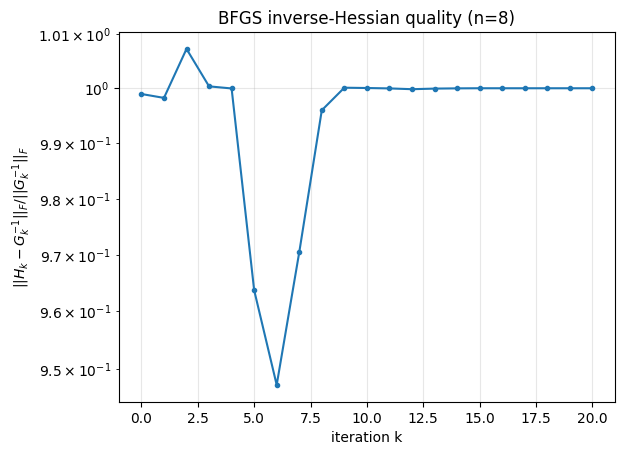

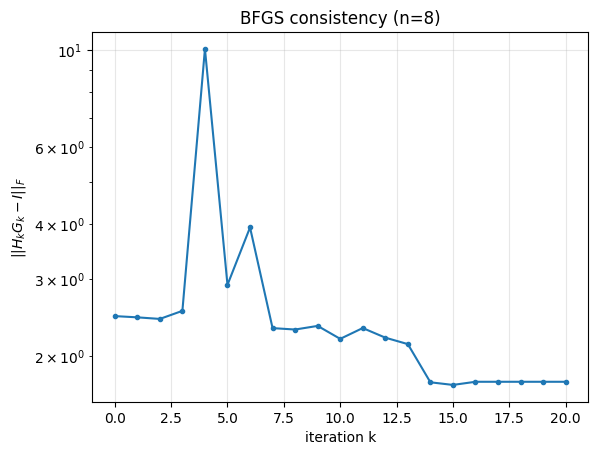

In [1]:
import numpy as np

def numeric_hessian(f, x, eps=5e-6, clip_bounds=None):
    x = x.astype(float); n = x.size
    H = np.zeros((n, n))
    def f_eval(z):
        if clip_bounds is not None:
            lb, ub = clip_bounds; z = np.clip(z, lb, ub)
        return f(z)
    for i in range(n):
        ei = np.zeros(n); ei[i]=1.0
        for j in range(i, n):
            ej = np.zeros(n); ej[j]=1.0
            fpp = f_eval(x + eps*ei + eps*ej)
            fpm = f_eval(x + eps*ei - eps*ej)
            fmp = f_eval(x - eps*ei + eps*ej)
            fmm = f_eval(x - eps*ei - eps*ej)
            H[i,j] = (fpp - fpm - fmp + fmm)/(4*eps*eps)
            H[j,i] = H[i,j]
    return 0.5*(H+H.T)

def rebuild_bfgs_H_sequence(problem, xs, use_scaled_H0=True, damped=False):
    """
    给定迭代点 xs[k]，重建标准（或阻尼）BFGS 的 H_k 序列，用于评估 H_k ≈ G(x_k)^{-1}。
    不依赖优化器内部实现。
    """
    xs = np.asarray(xs)
    n = xs.shape[1]
    Hs = []
    H = np.eye(n)
    Hs.append(H.copy())

    # 准备梯度列表
    gs = [problem.g(x) for x in xs]

    # 可选的 H0 缩放
    if use_scaled_H0 and len(xs) >= 2:
        s0 = xs[1]-xs[0]
        y0 = gs[1]-gs[0]
        yy = float(y0 @ y0); ys = float(y0 @ s0)
        if np.isfinite(yy) and yy>1e-16 and np.isfinite(ys) and ys>1e-12:
            rho0 = ys/yy
            if rho0>1e-12:
                H = rho0*np.eye(n)
                Hs[0] = H.copy()

    for k in range(len(xs)-1):
        s = xs[k+1]-xs[k]
        y = gs[k+1]-gs[k]
        ys = float(y @ s)
        if not np.isfinite(ys) or ys <= 1e-12:
            Hs.append(H.copy()); continue

        if damped:
            Hy  = H @ y
            sHs = float(s @ (H @ s)); sHs = max(sHs, 1e-16)
            theta = 1.0
            if ys < 0.2*sHs:
                theta = (0.8*sHs)/(sHs - ys + 1e-16)
            y_bar = theta*y + (1-theta)*(H @ s)
            rho = float(s @ y_bar)
            if not np.isfinite(rho) or abs(rho)<1e-12:
                Hs.append(H.copy()); continue
            V = np.eye(n) - (np.outer(s, y_bar)/rho)
            H = V @ H @ V.T + (np.outer(s, s)/rho)
        else:
            rho = 1.0/ys
            V = np.eye(n) - rho*np.outer(s, y)
            H = V @ H @ V.T + rho*np.outer(s, s)
        H = 0.5*(H+H.T)
        Hs.append(H.copy())
    return Hs

import matplotlib.pyplot as plt
from problems.chebyquad_adapter import make_chebyquad_problem
from QNOptimizers import BFGS  # 只为跑出 xs；不改源码

# 先跑一遍以获得 xs
n = 8
problem, x0 = make_chebyquad_problem(n, use_grad=True)
opt = BFGS(problem, tol=1e-8, max_iter=1000)   # 用默认线搜索就好
x_star = opt.solve(x0)

xs = np.array(opt.iter_info['x'])  # 如果你们记录在别的 key，改这里
Hs = rebuild_bfgs_H_sequence(problem, xs, use_scaled_H0=True, damped=False)

errs_invF, errs_prodI = [], []
clip = (np.zeros(xs.shape[1]), np.ones(xs.shape[1]))  # 可选：限制在 [0,1]
for k, (xk, Hk) in enumerate(zip(xs, Hs)):
    Gk = numeric_hessian(problem.f, xk, eps=5e-6, clip_bounds=clip)
    Ginv = np.linalg.pinv(Gk)
    # 两种指标都给出
    err1 = np.linalg.norm(Hk - Ginv, 'fro')/max(1.0, np.linalg.norm(Ginv,'fro'))
    err2 = np.linalg.norm(Hk @ Gk - np.eye(Gk.shape[0]), 'fro')
    errs_invF.append(err1); errs_prodI.append(err2)

plt.figure(); plt.semilogy(errs_invF, '-o', ms=3)
plt.xlabel('iteration k'); plt.ylabel(r'$||H_k-G_k^{-1}||_F / ||G_k^{-1}||_F$')
plt.title(f'BFGS inverse-Hessian quality (n={n})'); plt.grid(True, alpha=0.3)

plt.figure(); plt.semilogy(errs_prodI, '-o', ms=3)
plt.xlabel('iteration k'); plt.ylabel(r'$||H_k G_k - I||_F$')
plt.title(f'BFGS consistency (n={n})'); plt.grid(True, alpha=0.3)

print(f'final rel inverse error: {errs_invF[-1]:.2e}')
print(f'final product-to-I error: {errs_prodI[-1]:.2e}')

我们的 BFGS 在 max_iter=2000 后变成 NaN